In [ ]:
#import required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
#read the csv file
data=pd.read_csv('/content/Obesity.csv')

In [ ]:
#to know first 5 raw of data

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#to last 5 row of data
data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#to know size of dataframe
data.shape

(2111, 17)

In [ ]:
#to know tyes of column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [ ]:
#to know statistics of the dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# to know all column name
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

##EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# For draw pairplot of numericolumns and more needs we find numerical column name
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [ ]:
#to know catogorical column name
cate_cols = data.select_dtypes(include=['object']).columns
cate_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

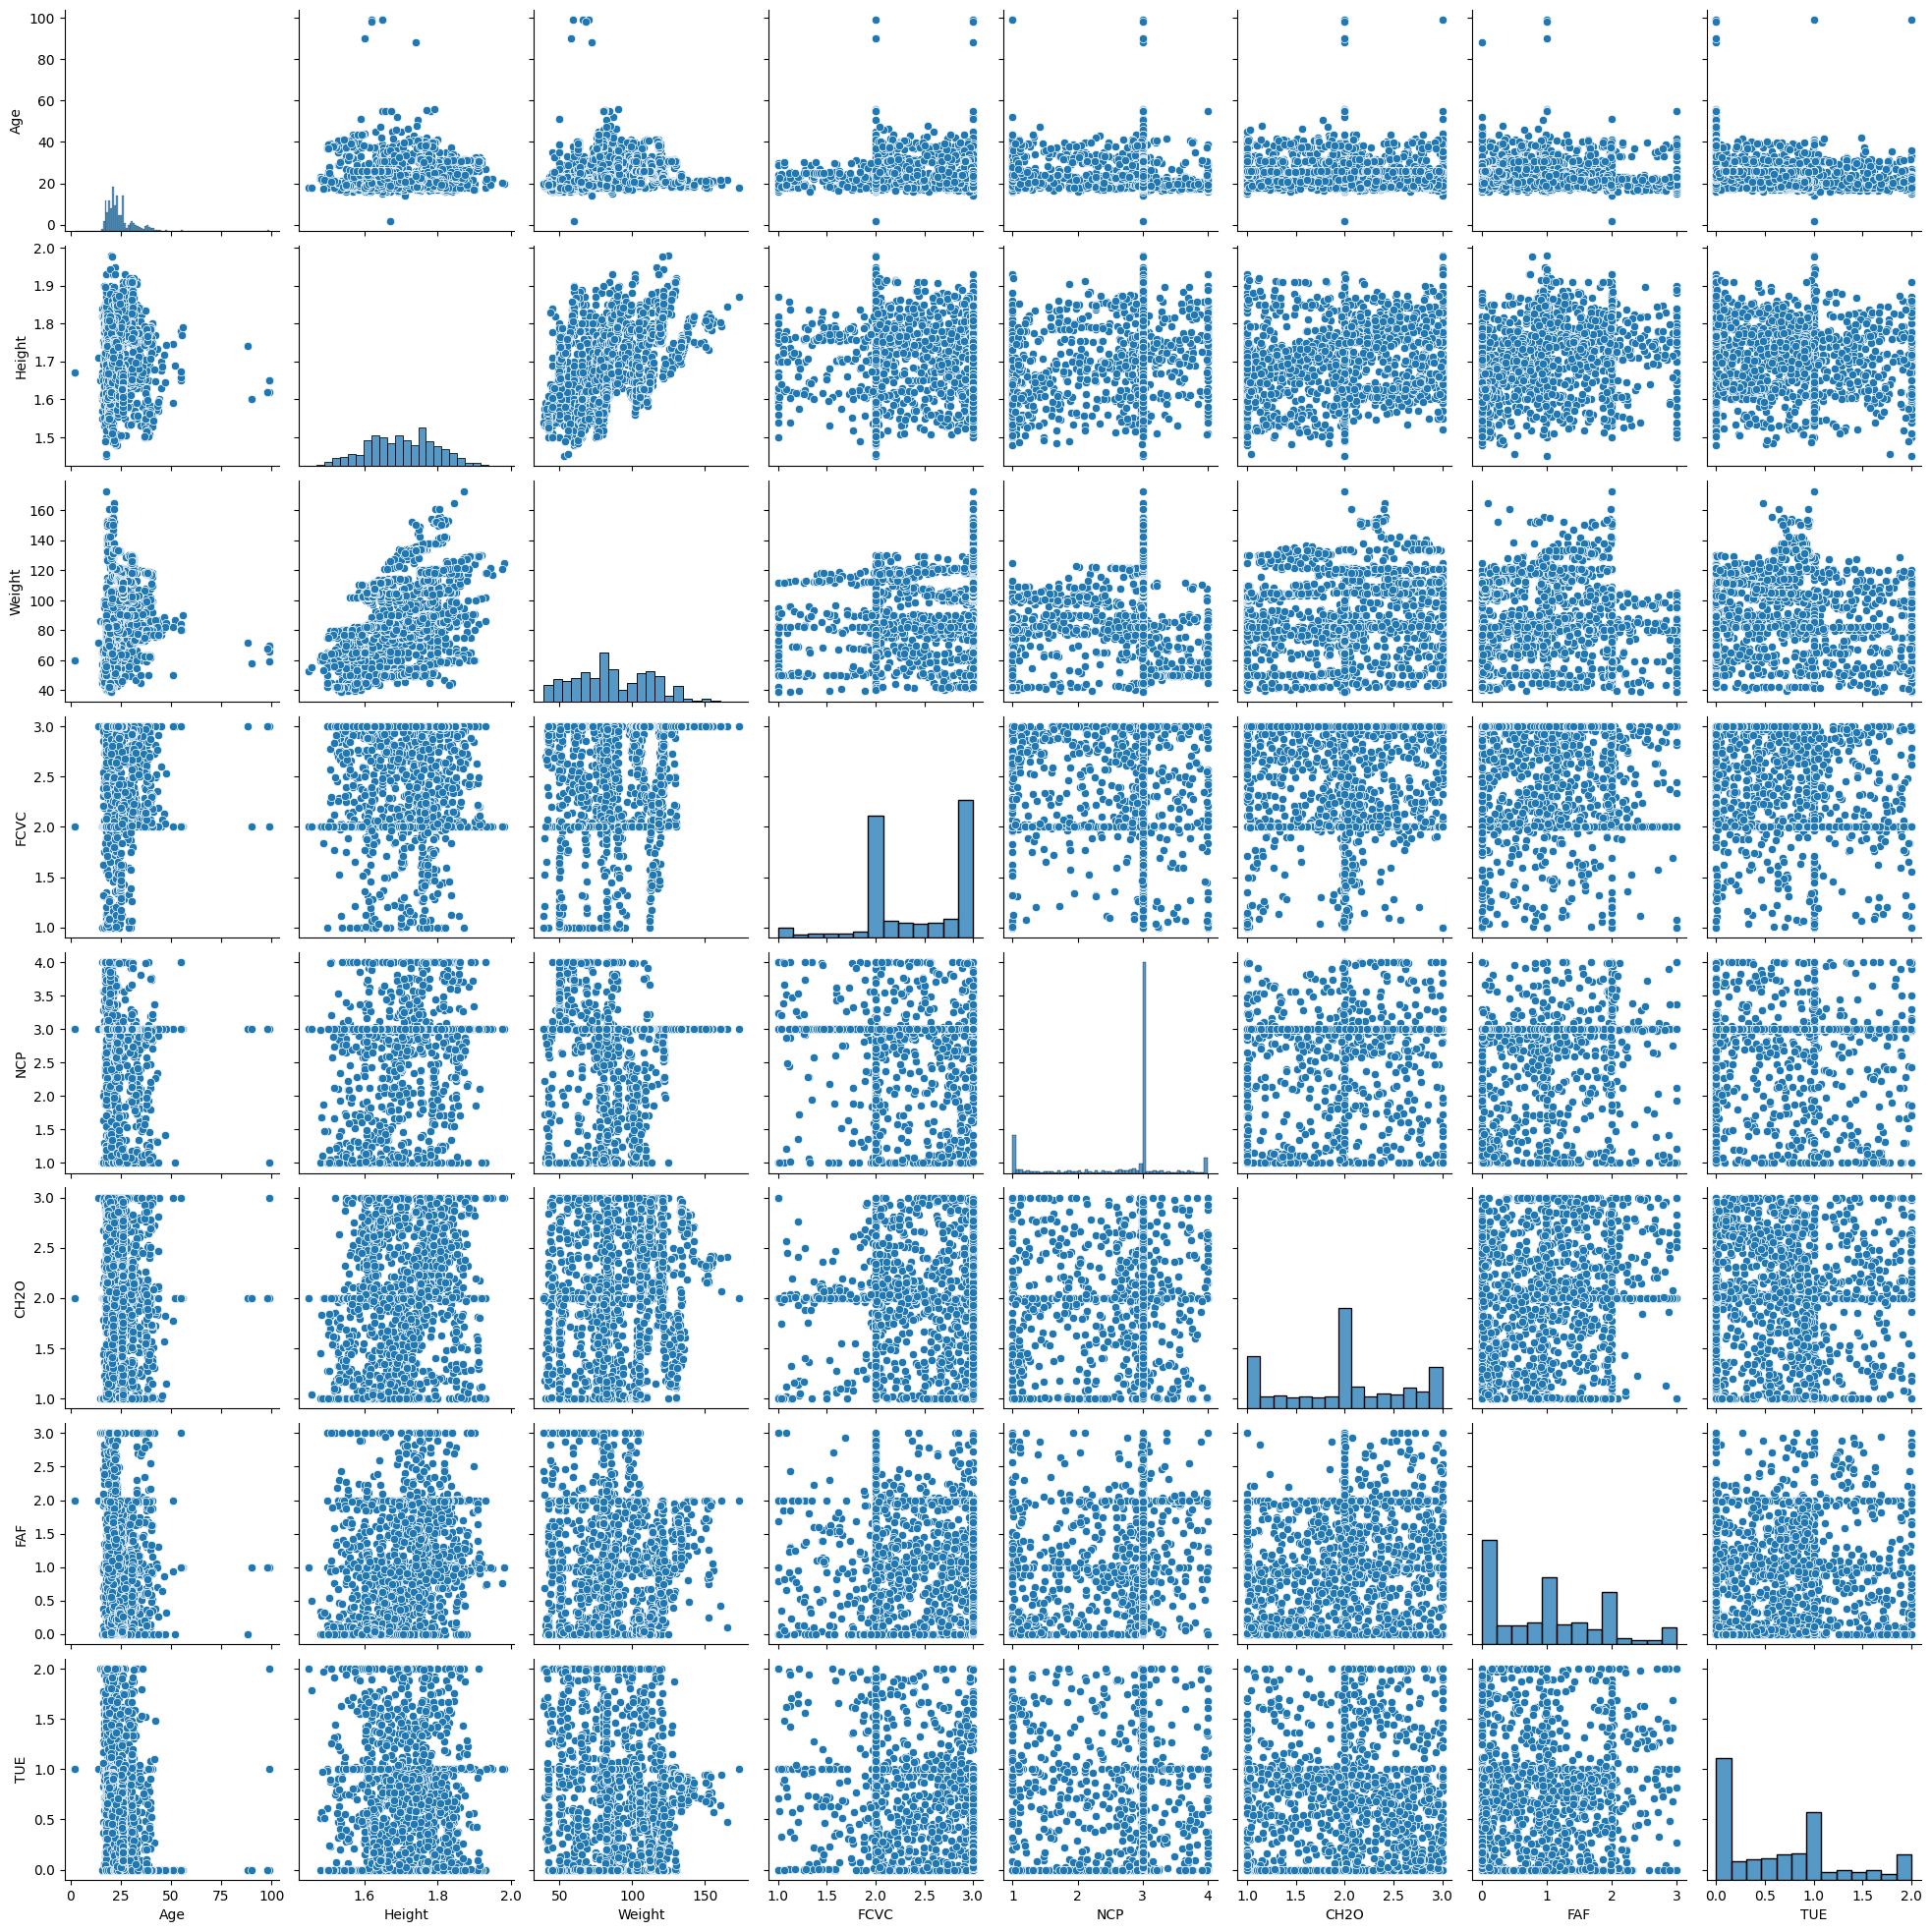

In [ ]:
#to draw Pairplot for numerical columns
sns.pairplot(data[numeric_cols])
plt.show()

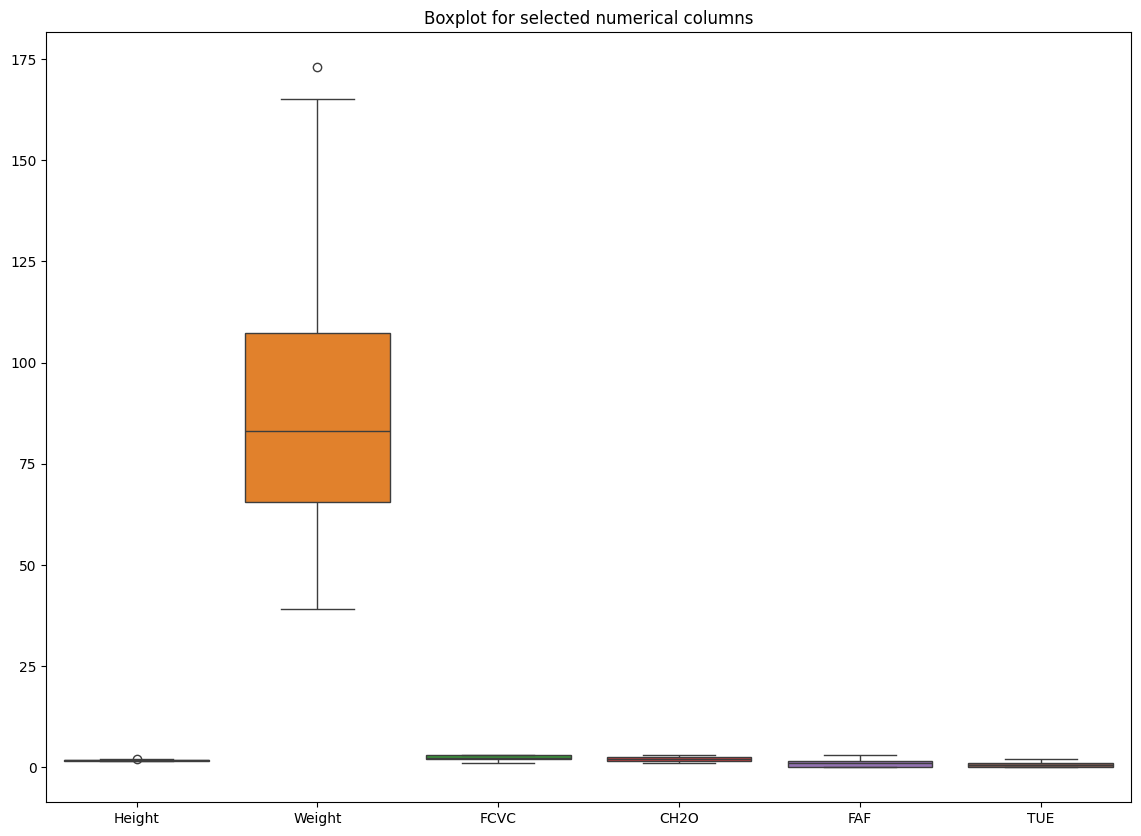

In [ ]:
#visualisation of selected columns by boxplot
selected_cols=['Height', 'Weight', 'FCVC',  'CH2O', 'FAF', 'TUE']


plt.figure(figsize=(14,10))
sns.boxplot(data=data[selected_cols])
plt.title('Boxplot for selected numerical columns')
plt.show()

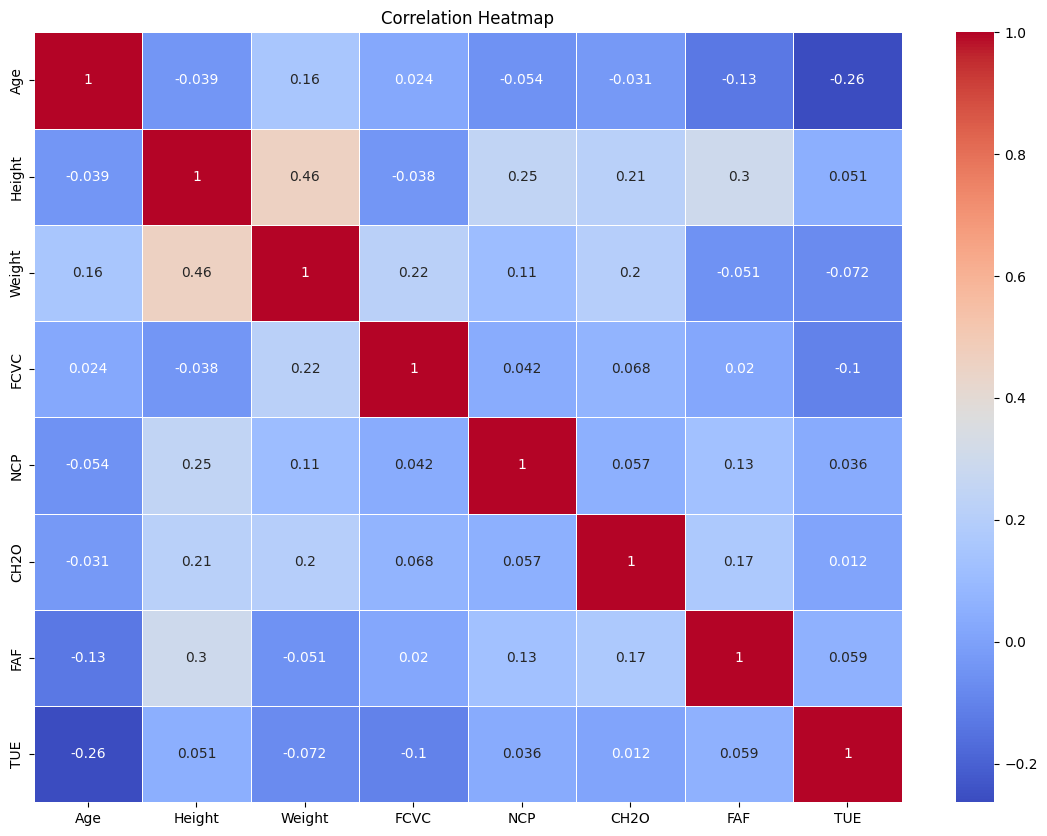

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

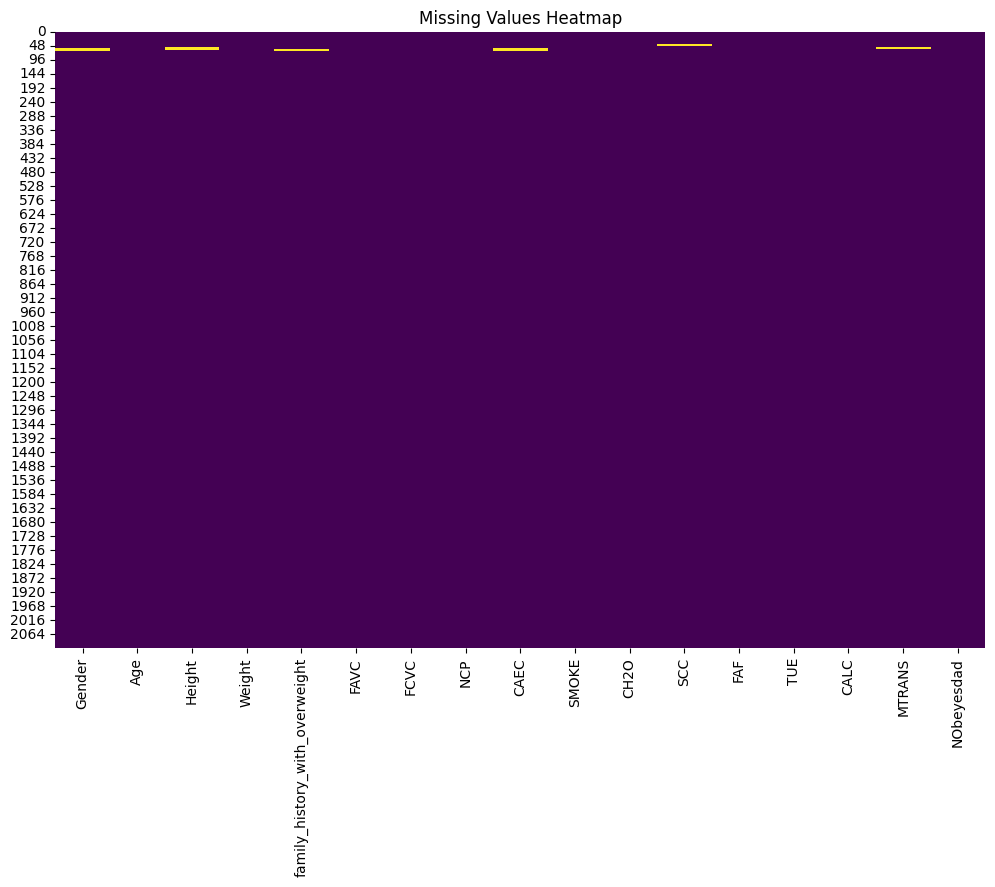

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#checking missing values
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [ ]:
#handle missing values
# Drop rows with missing values in 'gender'
df = data.dropna(subset=['Gender'])

In [ ]:

#drop column with missing value
df_cleaned=data.drop(columns=['Height'])

# Impute missing values for numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])


# Impute missing values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])


In [ ]:
#check null values again
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

ENCODING

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()

In [ ]:
#show first few raw of data for encoding
data.head(7)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight


In [ ]:
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = label_encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = label_encoder.fit_transform(data['FAVC'])
data['CAEC'] = label_encoder.fit_transform(data['CAEC'])
data['SMOKE'] = label_encoder.fit_transform(data['SMOKE'])
data['SCC'] = label_encoder.fit_transform(data['SCC'])
data['CALC'] = label_encoder.fit_transform(data['CALC'])

In [ ]:
# Handle categorical columns with more than two categories using one-hot encoding
data = pd.get_dummies(data, columns=['MTRANS', 'NObeyesdad'])

In [ ]:
# Standardize numerical columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [ ]:
#display few raws of preprocessed data
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,-0.473728,-0.881238,-0.862558,1,0,-0.785019,0.404153,2,0,...,0,1,0,0,1,0,0,0,0,0
1,0,-0.473728,-1.955987,-1.168077,1,0,1.088342,0.404153,2,1,...,0,1,0,0,1,0,0,0,0,0
2,1,-0.202122,1.053311,-0.366090,1,0,-0.785019,0.404153,2,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0.341090,1.053311,0.015808,0,0,1.088342,0.404153,2,0,...,0,0,1,0,0,0,0,0,1,0
4,1,-0.337925,0.838361,0.122740,0,0,-0.785019,-2.167023,2,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
#check info again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

#randomforest

In [ ]:
# Import necessary libraries for model building
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Assuming 'NObeyesdad' is the target variable, and  want to predict it
X = df.drop([ 'Age'], axis=1)
y = df['NObeyesdad']

# Encode
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['family_history_with_overweight'] = label_encoder.fit_transform(X['family_history_with_overweight'])
X['FAVC'] = label_encoder.fit_transform(X['FAVC'])
X['CAEC'] = label_encoder.fit_transform(X['CAEC'])
X['SMOKE'] = label_encoder.fit_transform(X['SMOKE'])
X['CALC'] = label_encoder.fit_transform(X['CALC'])
X['SCC'] = label_encoder.fit_transform(X['SCC'])
# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['MTRANS'])
X = pd.get_dummies(X, columns=['NObeyesdad'])





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [ ]:
print(y_train.unique())

['Overweight_Level_II' 'Obesity_Type_III' 'Obesity_Type_I' 'Normal_Weight'
 'Overweight_Level_I' 'Obesity_Type_II' 'Insufficient_Weight']


In [ ]:
import pandas as pd

# Check for missing values in X_train
missing_values = X_train.isnull().sum().sum()

# Print the number of missing values
print(f"Number of missing values in X_train: {missing_values}")

Number of missing values in X_train: 3


In [ ]:
# If there are missing values, impute them using a suitable method
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Re-train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        63
      Normal_Weight       1.00      1.00      1.00        60
     Obesity_Type_I       1.00      1.00      1.00        70
    Obesity_Type_II       1.00      1.00      1.00        50
   Obesity_Type_III       1.00      1.00      1.00        72
 Overweight_Level_I       1.00      1.00      1.00        50
Overweight_Level_II       1.00      1.00      1.00        56

           accuracy                           1.00       421
          macro avg       1.00      1.00      1.00       421
       weighted avg       1.00      1.00      1.00       421



In [ ]:
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        63
      Normal_Weight       1.00      1.00      1.00        60
     Obesity_Type_I       1.00      1.00      1.00        70
    Obesity_Type_II       1.00      1.00      1.00        50
   Obesity_Type_III       1.00      1.00      1.00        72
 Overweight_Level_I       1.00      1.00      1.00        50
Overweight_Level_II       1.00      1.00      1.00        56

           accuracy                           1.00       421
          macro avg       1.00      1.00      1.00       421
       weighted avg       1.00      1.00      1.00       421



DECISSION TREE

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Assuming 'NObeyesdad' is the target variable, and  want to predict it
X = df.drop([ 'Age'], axis=1)
y = df['NObeyesdad']

# Encode
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['family_history_with_overweight'] = label_encoder.fit_transform(X['family_history_with_overweight'])
X['FAVC'] = label_encoder.fit_transform(X['FAVC'])
X['CAEC'] = label_encoder.fit_transform(X['CAEC'])
X['SMOKE'] = label_encoder.fit_transform(X['SMOKE'])
X['CALC'] = label_encoder.fit_transform(X['CALC'])
X['SCC'] = label_encoder.fit_transform(X['SCC'])
# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['MTRANS'])
X = pd.get_dummies(X, columns=['NObeyesdad'])


In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        63
      Normal_Weight       1.00      1.00      1.00        60
     Obesity_Type_I       1.00      1.00      1.00        70
    Obesity_Type_II       1.00      1.00      1.00        50
   Obesity_Type_III       1.00      1.00      1.00        72
 Overweight_Level_I       1.00      1.00      1.00        50
Overweight_Level_II       1.00      1.00      1.00        56

           accuracy                           1.00       421
          macro avg       1.00      1.00      1.00       421
       weighted avg       1.00      1.00      1.00       421


Confusion Matrix:
[[63  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  0 50  0  0  0]
 [ 0  0  0  0 72  0  0]
 [ 0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0 56]]


FINE TUNIG

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Assuming 'NObeyesdad' is the target variable, and  want to predict it
X = df.drop([ 'Age'], axis=1)
y = df['NObeyesdad']

# Encode
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['family_history_with_overweight'] = label_encoder.fit_transform(X['family_history_with_overweight'])
X['FAVC'] = label_encoder.fit_transform(X['FAVC'])
X['CAEC'] = label_encoder.fit_transform(X['CAEC'])
X['SMOKE'] = label_encoder.fit_transform(X['SMOKE'])
X['CALC'] = label_encoder.fit_transform(X['CALC'])
X['SCC'] = label_encoder.fit_transform(X['SCC'])
# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['MTRANS'])
X = pd.get_dummies(X, columns=['NObeyesdad'])



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Best Model: {accuracy:.2f}')

# Print classification report for the best model
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)
